# Imputation Data Agriculture Menggunakan CNN

Notebook ini akan menjelaskan tentang memprediksi data atau mengisi data yang hilang menggunakan Convolution Neural Network.

Dataset yang digunakan adalah data komoditi agriculture dari tahun 1993 sampai 2015.

Notebook ini hanya menggunakan data komoditi kacang tanah untuk dataset-nya.

## Eksplore Dataset

In [1]:
# Import library untuk pengolahan data dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Memuat dataset pertanian salah satunya komoditi Kacang tanah dari tahun 1993 sampai 2015
df_nut=pd.read_csv('dataset/KacangTanah.csv',index_col="Provinsi")

In [3]:
# Melihat 10 baris pertama dataset
df_nut.head(10)

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Provinsi,,,,,,,,,,,,,,,,,,,,,
ACEH,19056,23380,32517,22639,20288,9513,11124,9179,5047,7377,...,11091,7972,6322,5926,7063,6172,6934,3861,3080,2527
SUMATERA UTARA,24801,28134,32115,30330,31188,26037,21986,23901,22485,23296,...,20118,20329,19316,16771,16449,11093,12074,11351,9777,8517
SUMATERA BARAT,6894,9523,9842,10702,10021,8804,9005,8583,8712,8757,...,10116,9671,10260,9207,9162,11908,9597,9093,7410,5964
RIAU,3799,4556,4354,3820,3144,4366,4089,3882,3180,4142,...,3387,3225,2240,2020,2007,1692,1622,1243,1134,1036
JAMBI,3405,2658,4053,3403,2469,4742,3554,-,2614,1807,...,2431,2501,2367,2184,1782,1680,1535,1513,1461,1176
SUMATERA SELATAN,18854,10322,17897,17435,12630,9424,13756,7731,6167,6218,...,11696,7676,7499,6459,6109,3960,4060,3475,2720,2021
BENGKULU,8594,6861,8920,8740,9215,7824,6156,5628,5472,6035,...,7038,5430,4585,3472,7253,6444,5802,4679,4612,3630
LAMPUNG,12123,10294,20470,16314,10061,13007,7467,9532,14022,9331,...,11888,12756,13088,11090,17617,12911,10694,10676,9951,4963
KEP. BANGKA BELITUNG,-,-,-,-,-,-,-,-,333,286,...,525,568,422,387,358,339,325,357,224,144


In [4]:
# Melihat ringkasan dataset
df_nut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, ACEH to PAPUA
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1993    34 non-null     object
 1   1994    34 non-null     object
 2   1995    34 non-null     object
 3   1996    34 non-null     object
 4   1997    34 non-null     object
 5   1998    34 non-null     object
 6   1999    34 non-null     object
 7   2000    34 non-null     object
 8   2001    34 non-null     object
 9   2002    34 non-null     object
 10  2003    34 non-null     object
 11  2004    34 non-null     object
 12  2005    34 non-null     object
 13  2006    34 non-null     object
 14  2007    34 non-null     object
 15  2008    34 non-null     object
 16  2009    34 non-null     object
 17  2010    34 non-null     object
 18  2011    34 non-null     object
 19  2012    34 non-null     object
 20  2013    34 non-null     object
 21  2014    34 non-null     int64 
 22  2015    34 non-null     int

In [5]:
# Mengubah nilai object menjadi numeric
# Mengisi nilai yang hilang dengan nan
for series in df_nut:
  if df_nut[series].dtypes == object:
    df_nut[series] = df_nut[series].str.replace('-', '')
  for elemen in df_nut[series].keys():
    if df_nut[series][elemen] == '':
      df_nut[series][elemen] = np.nan
    else:
      df_nut[series][elemen] =pd.to_numeric(df_nut[series][elemen])

In [6]:
# Melihat 10 baris pertama dataset yang telah dikonversi
df_nut.head(10)

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Provinsi,,,,,,,,,,,,,,,,,,,,,
ACEH,19056,23380,32517,22639,20288,9513,11124,9179,5047,7377,...,11091,7972,6322,5926,7063,6172,6934,3861,3080,2527
SUMATERA UTARA,24801,28134,32115,30330,31188,26037,21986,23901,22485,23296,...,20118,20329,19316,16771,16449,11093,12074,11351,9777,8517
SUMATERA BARAT,6894,9523,9842,10702,10021,8804,9005,8583,8712,8757,...,10116,9671,10260,9207,9162,11908,9597,9093,7410,5964
RIAU,3799,4556,4354,3820,3144,4366,4089,3882,3180,4142,...,3387,3225,2240,2020,2007,1692,1622,1243,1134,1036
JAMBI,3405,2658,4053,3403,2469,4742,3554,NaN,2614,1807,...,2431,2501,2367,2184,1782,1680,1535,1513,1461,1176
SUMATERA SELATAN,18854,10322,17897,17435,12630,9424,13756,7731,6167,6218,...,11696,7676,7499,6459,6109,3960,4060,3475,2720,2021
BENGKULU,8594,6861,8920,8740,9215,7824,6156,5628,5472,6035,...,7038,5430,4585,3472,7253,6444,5802,4679,4612,3630
LAMPUNG,12123,10294,20470,16314,10061,13007,7467,9532,14022,9331,...,11888,12756,13088,11090,17617,12911,10694,10676,9951,4963
KEP. BANGKA BELITUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333,286,...,525,568,422,387,358,339,325,357,224,144


In [7]:
# Mengecek dan menjumlahkan total nilai yang nilai nya null
df_nut.isnull().sum()

1993    8
1994    8
1995    8
1996    8
1997    8
1998    8
1999    8
2000    9
2001    5
2002    5
2003    4
2004    4
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    1
2013    1
2014    0
2015    0
dtype: int64

In [8]:
# Melihat gambaran umum statistik dari dataset
describe=df_nut.describe().transpose()
describe

,count,mean,std,min,25%,50%,75%,max
2014,34.0,18791.058824,39642.561791,0.0,1223.25,3874.0,10512.75,188491.0
2015,34.0,17807.323529,40161.237835,0.0,837.00,2999.0,8970.00,191579.0


## Visualisasi Dataset

Bagian ini kita akan membuat grafik untuk visualisasi dataset.

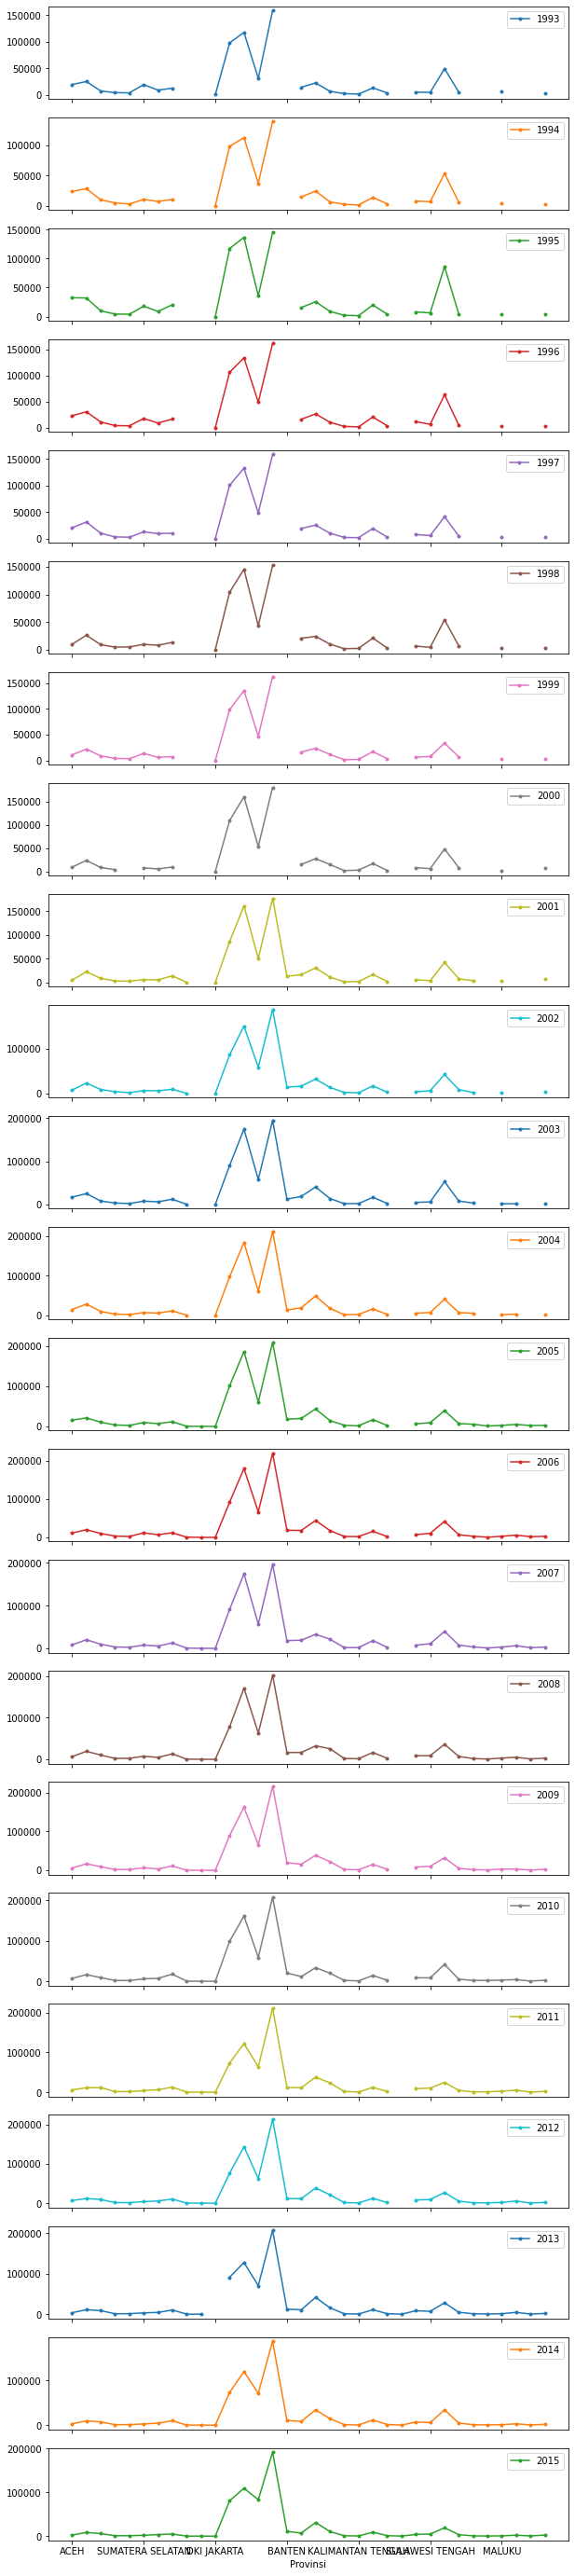

In [9]:
# Melihat grafik komoditi per tahun dari 1993 samapi 2015
_=df_nut.plot(figsize=(10, 50),subplots=True,style='.-')

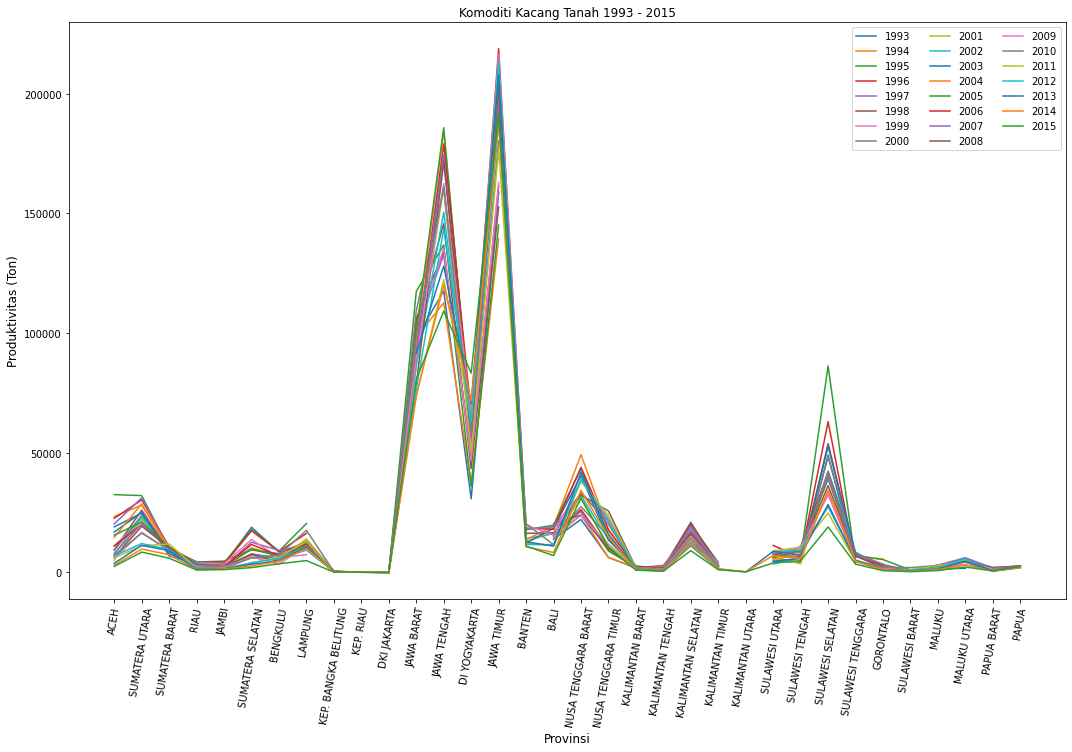

In [10]:
# Melihat grafik komoditi dalam satu gambar
plt.rcParams['figure.figsize']=(15,9)
plt.xlabel("Provinsi", size=12)
plt.ylabel("Produktivitas (Ton)", size=12)
plt.plot(df_nut, label=df_nut.keys())
plt.legend( ncol = 3)
plt.title('Komoditi Kacang Tanah 1993 - 2015') 
plt.tight_layout()
plt.xticks(rotation=80)
plt.show()

### Melihat korelasi antar kolom pada dataset

In [11]:
# Mengisi nilai nan dengan nilai rata-rata pada colom 2014
df_nut_fill = df_nut.fillna(df_nut['2014'].mean())

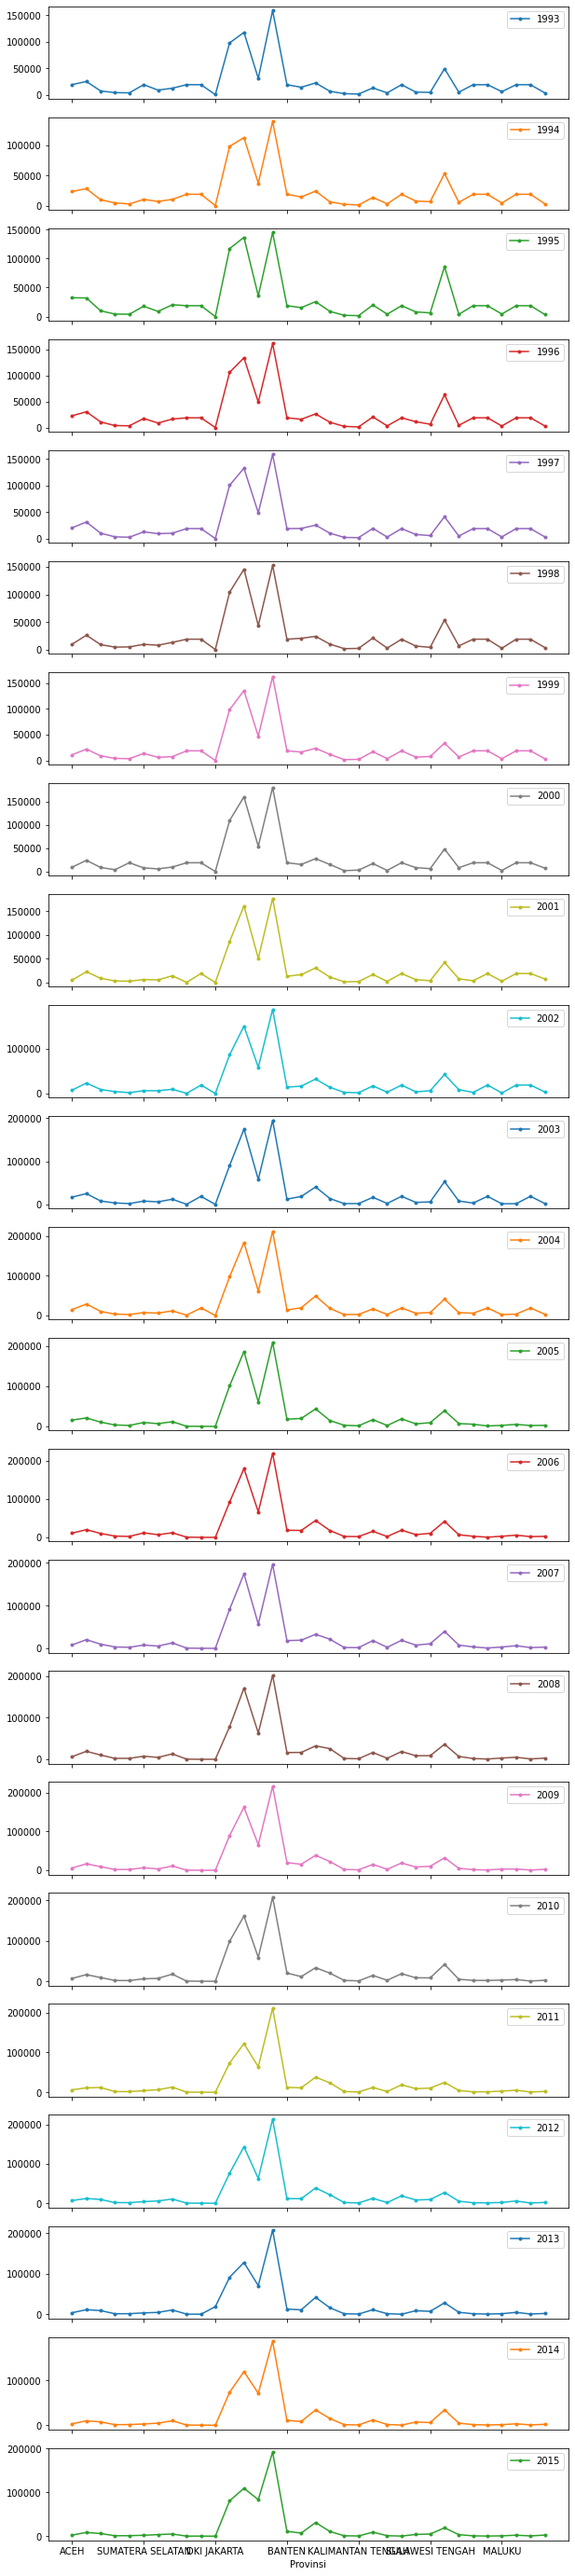

In [12]:
# Melihat grafik komoditi per tahun dari 1993 samapi 2015
_=df_nut_fill.plot(figsize=(10, 50),subplots=True,style='.-')

In [13]:
# Melihat korelasi antar tahun
# Membuat data korelasi menggunakan metode pearson (data numerik. karena bukan data kontinyu)
df_nut_fill.corr(method ='pearson')

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1993,1.000000,0.994481,0.975073,0.993012,0.991756,0.986964,0.989114,0.984020,0.971278,0.973000,...,0.957932,0.959407,0.948421,0.954192,0.966302,0.936547,0.946240,0.942215,0.942353,0.928429
1994,0.994481,1.000000,0.986558,0.996726,0.992737,0.990277,0.985200,0.982981,0.966722,0.967690,...,0.949989,0.953322,0.939745,0.944363,0.958821,0.921446,0.933073,0.932219,0.934143,0.919869
1995,0.975073,0.986558,1.000000,0.986406,0.968452,0.977625,0.954583,0.959692,0.942326,0.937077,...,0.921362,0.929035,0.910664,0.908957,0.931905,0.875094,0.891863,0.890811,0.896864,0.870831
1996,0.993012,0.996726,0.986406,1.000000,0.994333,0.993290,0.987632,0.987303,0.975750,0.976145,...,0.963028,0.966028,0.955215,0.957004,0.970158,0.934123,0.945932,0.943785,0.948834,0.932359
1997,0.991756,0.992737,0.968452,0.994333,1.000000,0.993683,0.996774,0.992425,0.982839,0.983774,...,0.970934,0.973839,0.964562,0.967305,0.975393,0.945152,0.957098,0.952935,0.954807,0.944401
1998,0.986964,0.990277,0.977625,0.993290,0.993683,1.000000,0.991561,0.993671,0.983778,0.978575,...,0.964164,0.971599,0.959346,0.957326,0.969692,0.925809,0.942632,0.936822,0.940869,0.922766
1999,0.989114,0.985200,0.954583,0.987632,0.996774,0.991561,1.000000,0.995111,0.986279,0.986995,...,0.975252,0.978231,0.970506,0.973796,0.979531,0.953013,0.964677,0.959026,0.959770,0.950971
2000,0.984020,0.982981,0.959692,0.987303,0.992425,0.993671,0.995111,1.000000,0.989004,0.986958,...,0.976852,0.981226,0.973462,0.973737,0.981155,0.949169,0.963157,0.957082,0.960516,0.947114
2001,0.971278,0.966722,0.942326,0.975750,0.982839,0.983778,0.986279,0.989004,1.000000,0.996723,...,0.986190,0.988821,0.985085,0.981526,0.985345,0.958469,0.973441,0.960548,0.966079,0.948519
2002,0.973000,0.967690,0.937077,0.976145,0.983774,0.978575,0.986995,0.986958,0.996723,1.000000,...,0.988993,0.988114,0.986641,0.987251,0.988551,0.972653,0.982767,0.973085,0.978469,0.965564


In [14]:
# Melihat korelasi antar provinsi
# Transpose data komditi
df_t=df_nut_fill.T

# Membuat data korelasi menggunakan metode pearson (data numerik. karena bukan data kontinyu)
df_t.corr(method ='pearson')

Provinsi,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,...,SULAWESI UTARA,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA
Provinsi,,,,,,,,,,,,,,,,,,,,,
ACEH,1.000000,0.817503,0.238137,0.679357,0.077471,0.825534,0.771612,0.463591,0.659904,0.595340,...,0.100641,-0.199940,0.824649,-0.191813,0.704074,0.598374,0.603548,0.494556,0.607521,0.037858
SUMATERA UTARA,0.817503,1.000000,0.227307,0.873862,0.260023,0.763503,0.699389,0.383232,0.664972,0.820460,...,-0.027951,-0.346602,0.802132,0.242172,0.738472,0.824452,0.473193,0.667741,0.836917,0.373230
SUMATERA BARAT,0.238137,0.227307,1.000000,0.151961,-0.067656,0.160503,0.304845,0.438430,-0.007534,-0.119494,...,0.635064,0.608007,0.123827,0.063872,0.021286,-0.106647,0.216508,0.008032,-0.106093,-0.102050
RIAU,0.679357,0.873862,0.151961,1.000000,0.353392,0.721229,0.612968,0.232248,0.661483,0.783196,...,-0.181136,-0.283838,0.727318,0.435816,0.732466,0.786385,0.472176,0.742152,0.806484,0.429307
JAMBI,0.077471,0.260023,-0.067656,0.353392,1.000000,0.150249,0.067952,-0.049511,0.472940,0.348768,...,0.152064,-0.188215,0.264888,0.317741,0.477095,0.349099,0.062726,0.406075,0.351777,0.697590
SUMATERA SELATAN,0.825534,0.763503,0.160503,0.721229,0.150249,1.000000,0.789477,0.418950,0.751102,0.569131,...,0.117900,-0.196957,0.725774,-0.115508,0.784186,0.571578,0.769737,0.636654,0.586216,0.156885
BENGKULU,0.771612,0.699389,0.304845,0.612968,0.067952,0.789477,1.000000,0.524844,0.668194,0.531694,...,0.144615,-0.246437,0.678493,-0.186326,0.696828,0.542636,0.562026,0.604862,0.541971,0.081609
LAMPUNG,0.463591,0.383232,0.438430,0.232248,-0.049511,0.418950,0.524844,1.000000,0.124682,0.095209,...,0.461313,0.082193,0.685683,-0.147605,0.148464,0.113022,0.442823,0.137422,0.098478,0.085902
KEP. BANGKA BELITUNG,0.659904,0.664972,-0.007534,0.661483,0.472940,0.751102,0.668194,0.124682,1.000000,0.700313,...,0.163148,-0.456308,0.601146,-0.183896,0.989898,0.699971,0.574252,0.823744,0.699887,0.343969


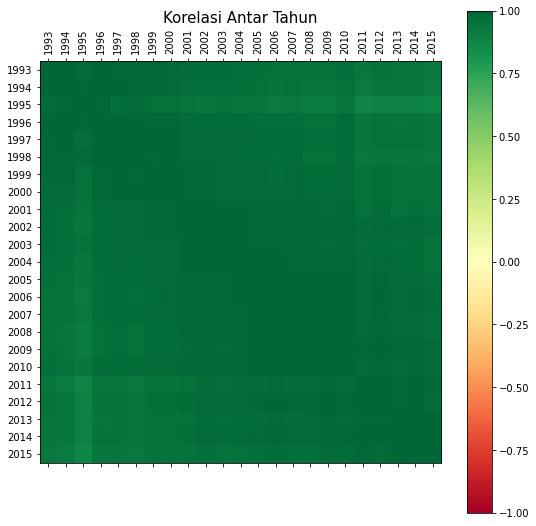

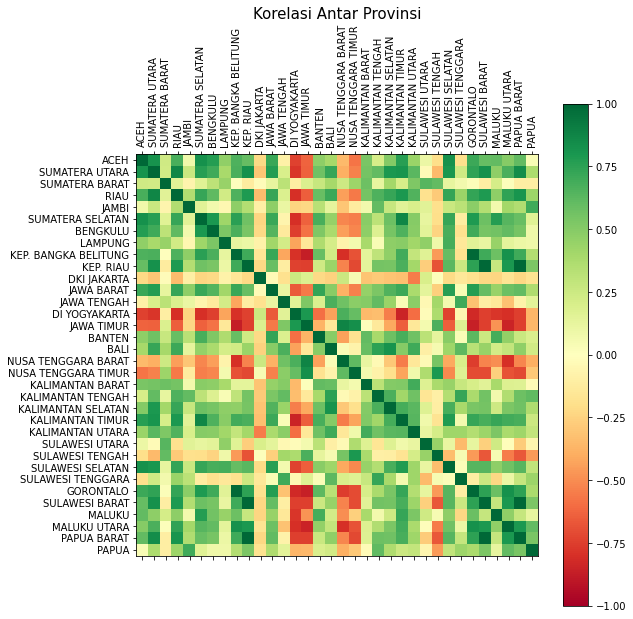

In [15]:
# visualisasi grafik korelasi antar kolom tahun 1993 sampai 2015
plt.matshow(df_nut_fill.corr(method ='pearson'),vmax=1,vmin=-1,cmap='RdYlGn')
plt.title('Korelasi Antar Tahun', size=15)
plt.colorbar()
plt.xticks(range(0,len(df_nut_fill.columns)), df_nut_fill.columns,rotation=90)
plt.yticks(range(0,len(df_nut_fill.columns)), df_nut_fill.columns)
plt.show()

# visualisasi grafik korelasi antar kolom provinsi
plt.matshow(df_t.corr(method ='pearson'),vmax=1,vmin=-1,cmap='RdYlGn')
plt.title('Korelasi Antar Provinsi', size=15)
plt.colorbar()
plt.xticks(range(0,len(df_t.columns)), df_t.columns,rotation=90)
plt.yticks(range(0,len(df_t.columns)), df_t.columns)
plt.show()

Skala diatas menujukan skala -1(merah) sampai 1(hijau). 

Data saling berkorelasi positif jika data mendekati atau sama dengan 1 atau warna hijau.

Data tidak memiliki korelasi atau korelasi rendah jika mendekati 0 atau warna yellow. bukan data yang penting 

Data saling berkorelasi negatif jika data mendekati atau sama dengan -1 atau warna merah.

Grafik diatas menunjukan, data yang sebagian besar memiliki korelasi positif adalah data antar tahun, karena grafik menunjukan hampir semua data warnanya hijau.

## Preprocessing Data

Data akan dibagi menjadi data train menggunakan data tahun 2014 dan data test menggunakan data tahun 2015.
Data tarin dan test dibagi menjadi data masukan 8 nilai dan data keluaran 26 nilai.

In [16]:
# Import library preprosesing data
from sklearn.preprocessing import MinMaxScaler

# Mengabaikan warning
import warnings 
warnings.filterwarnings("ignore")

In [17]:
# Membuat data training dari data lengkap tahun 2014
train = df_nut['2014']
train = pd.DataFrame(train)

# Membuat data validation dari data lengkap tahun 2015
val = df_nut['2015']
val = pd.DataFrame(train)

train.head(), val.head()

(                2014
 Provinsi            
 ACEH            3080
 SUMATERA UTARA  9777
 SUMATERA BARAT  7410
 RIAU            1134
 JAMBI           1461,
                 2014
 Provinsi            
 ACEH            3080
 SUMATERA UTARA  9777
 SUMATERA BARAT  7410
 RIAU            1134
 JAMBI           1461)

In [18]:
# Normalisasi data train menjadi skala umum 
# Kalkulasi input data dan transformasi dengan rentang nilai 0 sampai 1
scale = MinMaxScaler(feature_range=(0,1))
train_sc = scale.fit_transform(train)
val_sc = scale.fit_transform(val)
train_sc.shape, val_sc.shape

((34, 1), (34, 1))

In [19]:
# Membuat struktur data dengan 8 data awal dan 26 keluaran
x_train = []
y_train = []
x_train.append(train_sc[0:8, :])
y_train.append(train_sc[8:, :])

x_val = []
y_val = []
x_val.append(val_sc[0:8, :])
y_val.append(val_sc[8:, :])

In [20]:
# Konversi list ke numpy array
# Ukuran data [samples, timesteps, features]
x_train, y_train = np.array(x_train), np.array(y_train)
x_val, y_val = np.array(x_val), np.array(y_val)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(1, 8, 1) (1, 26, 1)
(1, 8, 1) (1, 26, 1)


## Membangun Model Deep Learning

Model deep learning menggunakan CNN (Convolution Neural Network)

In [21]:
# Import library tensor flow untuk deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.optimizers import Adam

In [22]:
# Mendifinisikan model 1D convolusi dengan masukan 8 data awal, 1 fitur dengan 26 keluaran
# Masukan [timesteps, features]
model = Sequential()
model.add(Conv1D(100, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2]), activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(52, activation='relu'))
model.add(Dense(26))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 100)            300       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 100)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 52)                15652     
                                                                 
 dense_1 (Dense)             (None, 26)                1378      
                                                                 
Total params: 17,330
Trainable params: 17,330
Non-trainable params: 0
____________________________________________________

In [23]:
# Compile model
model.compile(loss='mean_squared_error',optimizer=Adam())

In [24]:
# Fit CNN model dengan 100 epoch
epoch = 100 
history = model.fit(x=x_train,y=y_train,validation_data = (x_val, y_val),epochs=epoch,verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 547ms/step - loss: 0.0684 - val_loss: 0.0672
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0672 - val_loss: 0.0661
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0661 - val_loss: 0.0650
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0650 - val_loss: 0.0638
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0638 - val_loss: 0.0625
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0625 - val_loss: 0.0612
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0612 - val_loss: 0.0598
Epoch 8/100
1/1 [==============================] - 0s 55ms/step - loss: 0.0598 - val_loss: 0.0584
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0584 - val_loss: 0.0568
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0568 - val_loss: 0.0552
Epoch 11/100
1/1 [

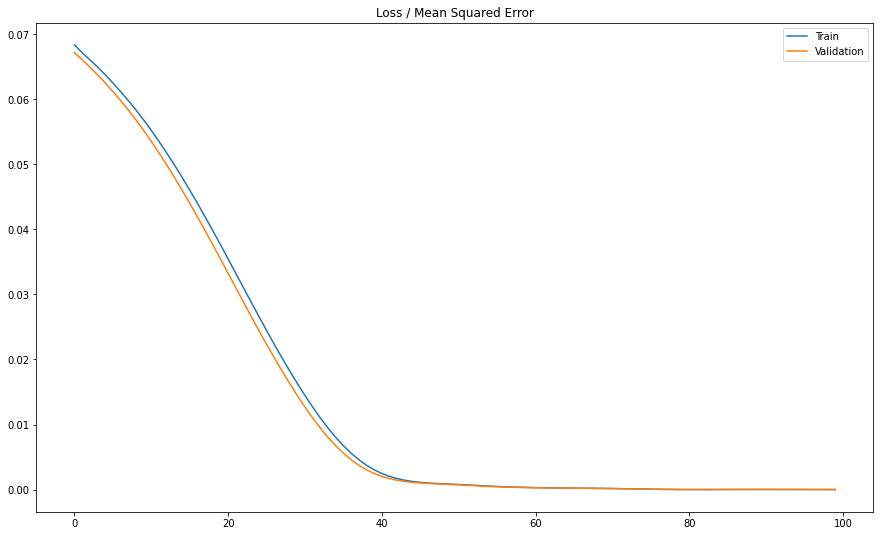

In [25]:
# Mengevaluasi model CNN
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

## Prediksi Data

pada prediksi data, data yang digunakan adalah data komoditi pada tahun 1993 karena terdapat data yang hilang. prediksi data menggunakan 8 data di awal.

In [26]:
# Mengambil 8 data awal pada data komoditi 1993
# Konversi data series ke dataframe
test_set=df_nut['1993'][:8]
test_set=pd.DataFrame(test_set)
test_set

,1993
Provinsi,
ACEH,19056
SUMATERA UTARA,24801
SUMATERA BARAT,6894
RIAU,3799
JAMBI,3405
SUMATERA SELATAN,18854
BENGKULU,8594
LAMPUNG,12123


In [27]:
# Merubah data array menjadi array 1 dimensi
# Transformasi input menjadi rentang nilai 0 sampai 1
input = test_set.values.reshape(-1,1)
input = scale.transform(input)

In [28]:
# Mengambil 8 data awal untuk Prediksi Stock 1993
# Konversi data menjadi array dan mengubah dimensi [samples, timesteps, features]
X_test = []
X_test.append(input[0:8, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(1, 8, 1)

In [29]:
# Prediksi data
# Inverse transformasi sebelumnya
pdc = model.predict(X_test)
final_predicted = scale.inverse_transform(pdc)
final_predicted.shape

1/1 [==============================] - 0s 79ms/step


(1, 26)

In [30]:
# Mengubah dimensi array
final_predict=np.array(final_predicted)
final_predict=final_predict.reshape(final_predicted.shape[1],1)

# Mengambil 8 data awal tahun 1993
first=np.array(df_nut['1993'][:8])
first=first.reshape(8,1)

# Menggabungkan 8 data awal dan hasil prediksi 
final=np.append(first,final_predict,axis=0)

In [31]:
# Konversi nilai minus menjadi nol
final = pd.DataFrame(final)
final[final < 0] = 0

# Memberi nama baris dan kolom
final.columns = ['1993']
final.index = df_nut.index
final

,1993
Provinsi,
ACEH,19056
SUMATERA UTARA,24801
SUMATERA BARAT,6894
RIAU,3799
JAMBI,3405
SUMATERA SELATAN,18854
BENGKULU,8594
LAMPUNG,12123
KEP. BANGKA BELITUNG,887.435181


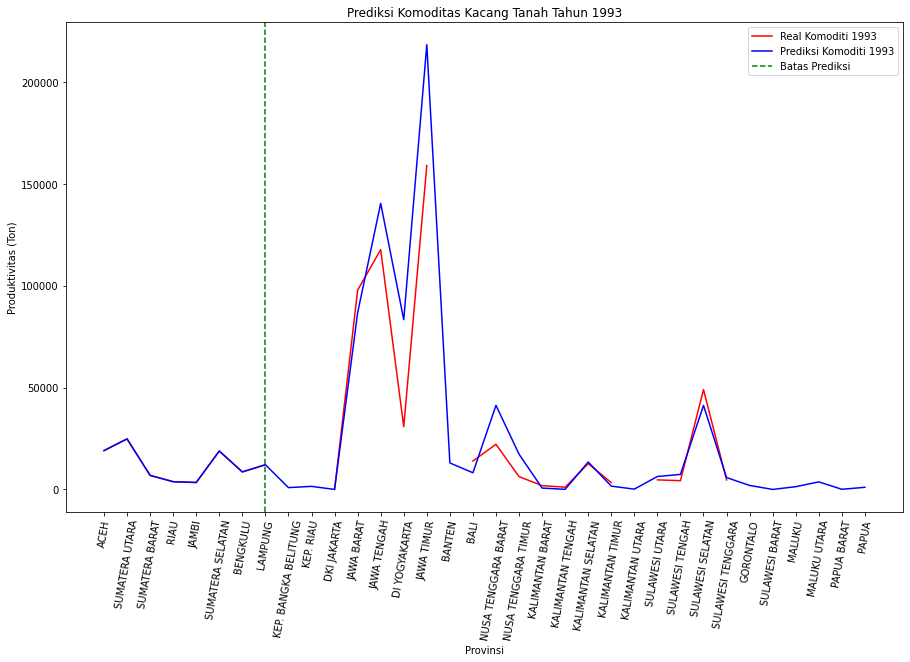

In [32]:
# Visualisasi hasil prediksi
plt.plot(df_nut['1993'], color = 'red', label = 'Real Komoditi 1993')
plt.plot(final, color = 'blue', label = 'Prediksi Komoditi 1993')
plt.title('Prediksi Komoditas Kacang Tanah Tahun 1993')
plt.xlabel('Provinsi')
plt.ylabel('Produktivitas (Ton)')
plt.axvline(x=first.shape[0]-1, c='g', linestyle='--', label='Batas Prediksi')
plt.legend()
plt.xticks(rotation=80)
plt.show()

## Catatan

Model CNN ini hanya dapat digunakan jika 8 data awal lengkap. jika ada salah satu 8 data awal yang hilang maka harus membuat model CNN baru yang menyesuakan masukan yang ada.

## Pustaka

https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/, [diakses 26 juli 2022]

https://www.tensorflow.org/tutorials/structured_data/time_series, [diakses 26 juli 2022]

https://github.com/amirrezaeian/Individual-household-electric-power-consumption-Data-Set-, [diakses 27 juli 2022]